In [1]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sys
%matplotlib inline

# Social Network Analysis
## Zachary's Karate Club (ZKC)

In [2]:
# Let's import the ZKC graph:
ZKC_graph = nx.karate_club_graph()

# Let's keep track of which nodes represent John A and Mr Hi
Mr_Hi = 0
John_A = 33

# Let's display the labels of which club each member ended up joining
club_labels = nx.get_node_attributes(ZKC_graph, 'club')

karate_club = pd.DataFrame({
    'index' : [key for key in club_labels.keys()],
    'club_members' : [value for value in club_labels.values()]
    }
)
karate_club.set_index('index', inplace=True)

# Show a couple of the labels
for key, value in club_labels.items():
    print(key, value)


0 Mr. Hi
1 Mr. Hi
2 Mr. Hi
3 Mr. Hi
4 Mr. Hi
5 Mr. Hi
6 Mr. Hi
7 Mr. Hi
8 Mr. Hi
9 Officer
10 Mr. Hi
11 Mr. Hi
12 Mr. Hi
13 Mr. Hi
14 Officer
15 Officer
16 Mr. Hi
17 Mr. Hi
18 Officer
19 Mr. Hi
20 Officer
21 Mr. Hi
22 Officer
23 Officer
24 Officer
25 Officer
26 Officer
27 Officer
28 Officer
29 Officer
30 Officer
31 Officer
32 Officer
33 Officer


In [3]:
karate_club

,club_members
index,
0,Mr. Hi
1,Mr. Hi
2,Mr. Hi
3,Mr. Hi
4,Mr. Hi
5,Mr. Hi
6,Mr. Hi
7,Mr. Hi
8,Mr. Hi


In [4]:
A = nx.convert_matrix.to_numpy_matrix(ZKC_graph)

A

matrix([[0., 4., 5., ..., 2., 0., 0.],
        [4., 0., 6., ..., 0., 0., 0.],
        [5., 6., 0., ..., 0., 2., 0.],
        ...,
        [2., 0., 0., ..., 0., 4., 4.],
        [0., 0., 2., ..., 4., 0., 5.],
        [0., 0., 0., ..., 4., 5., 0.]])

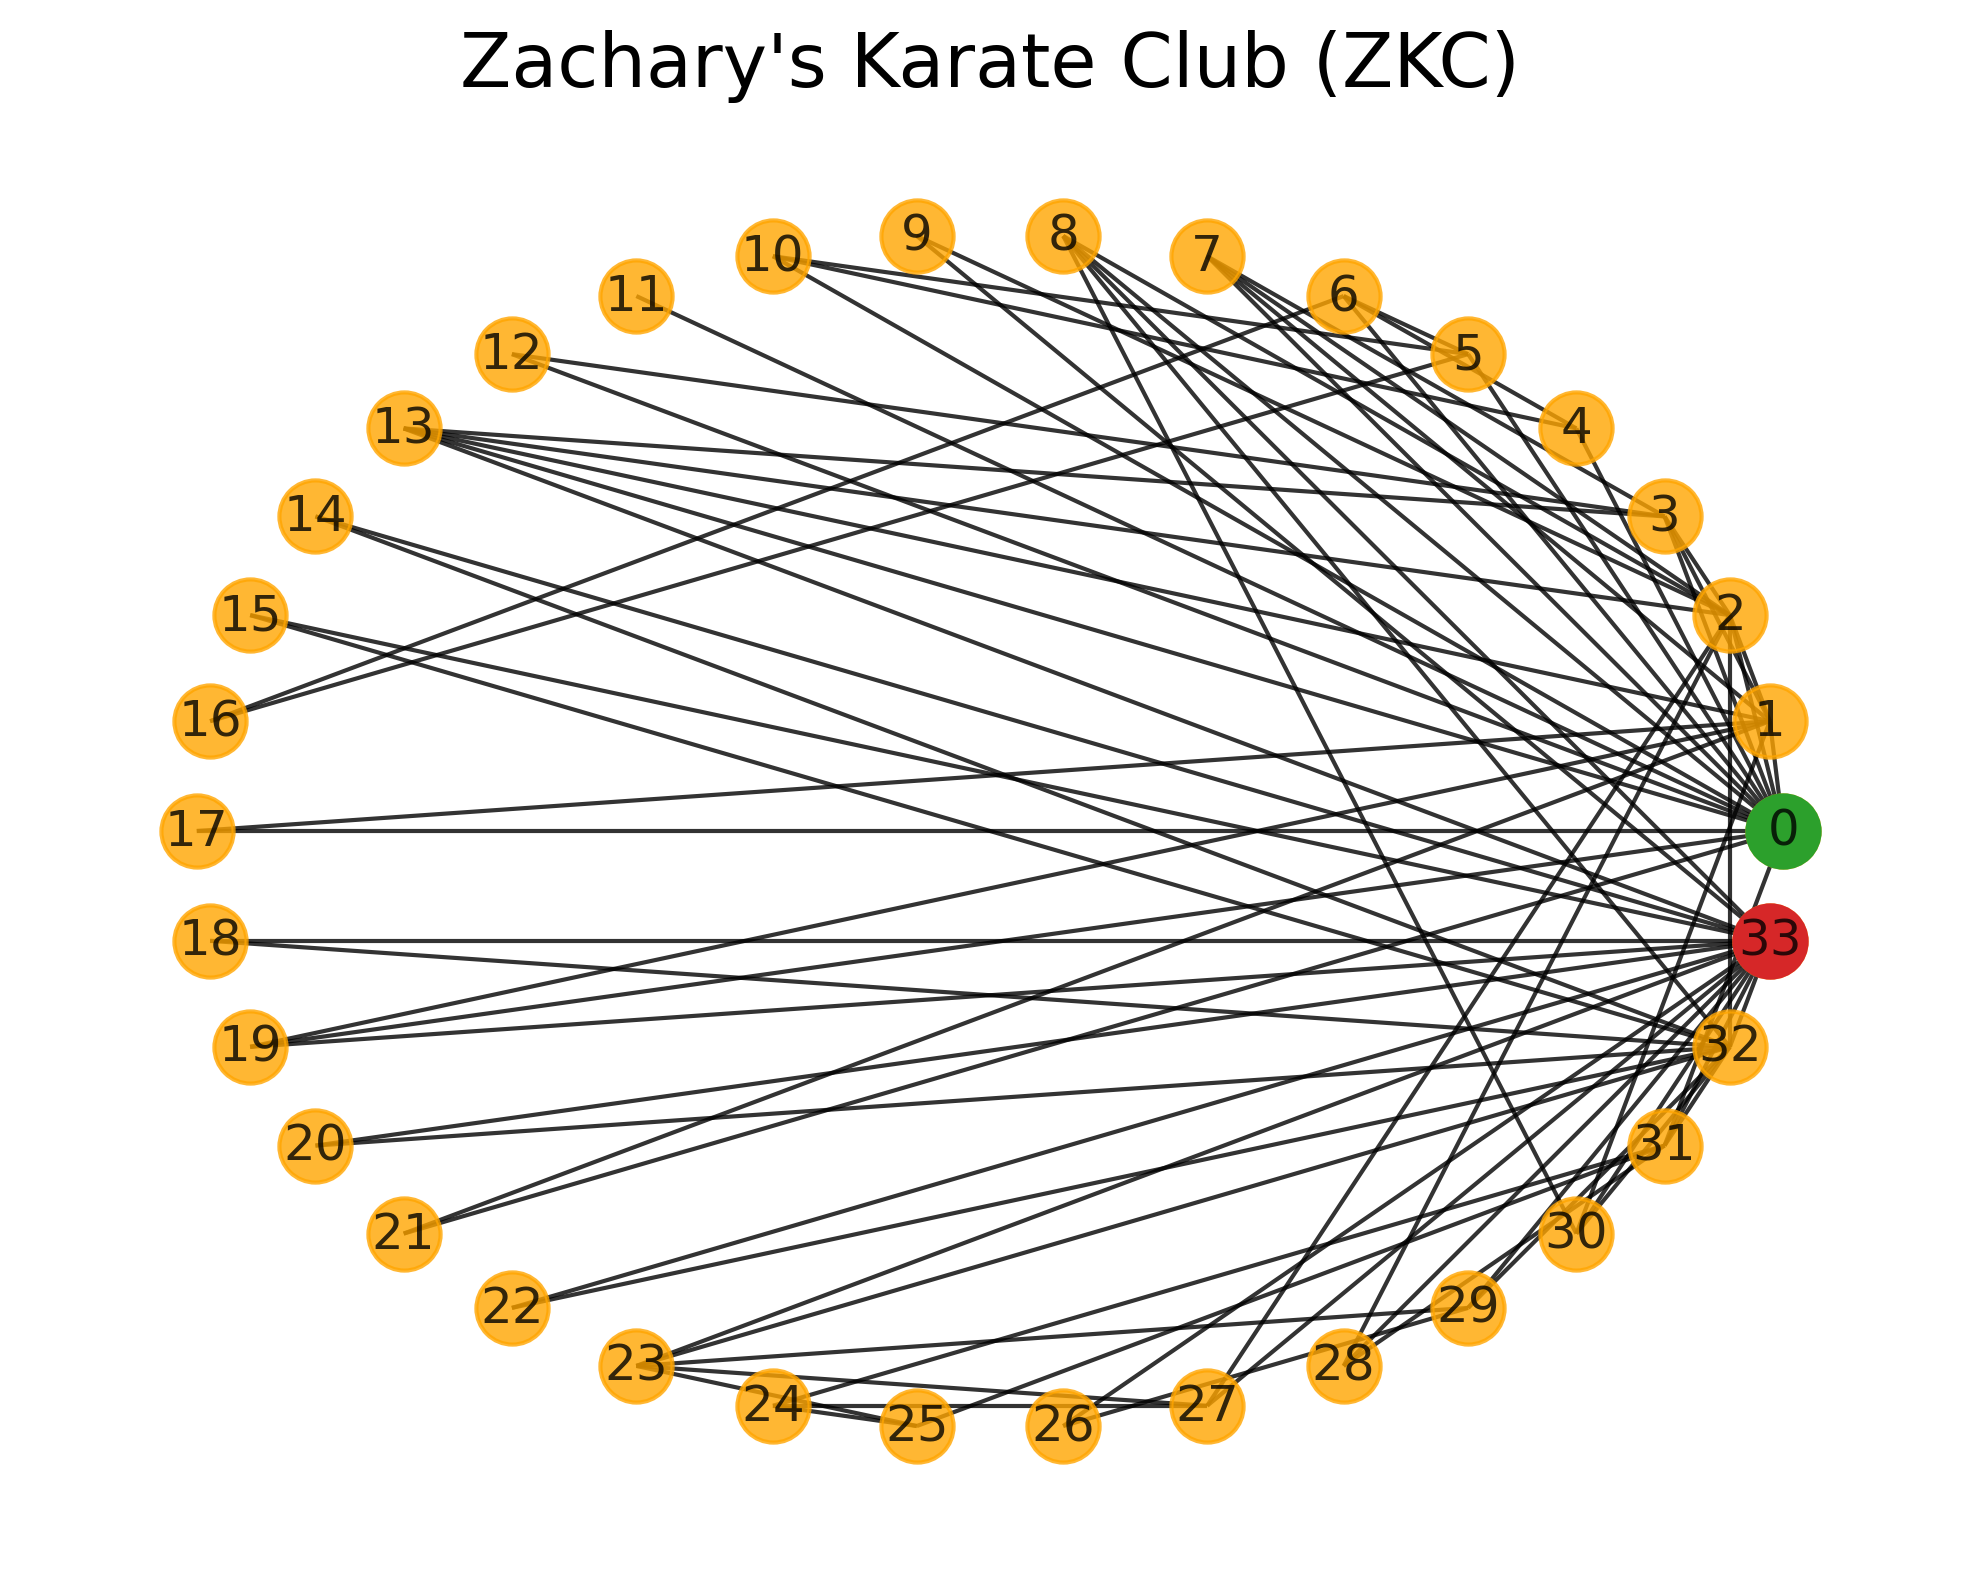

<Figure size 640x480 with 0 Axes>

In [16]:
f = plt.figure(dpi=300)
# To plot using networkx we first need to get the positions we want for each node. 
# Here we will use a ciruclar layout but there are many other variations you could choose!
circ_pos = nx.circular_layout(ZKC_graph) 

colors = []
labels = []
for _, v in club_labels.items():
    if v == 'Mr. Hi':
        colors.append('tab:green')
        labels.append('Mr. Hi')
    else:
        colors.append('tab:red')
        labels.append('Officer')

# Use the networkx draw function to easily visualise the graph
nx.draw(ZKC_graph, circ_pos, node_color='orange', with_labels=True, alpha=.8)

# Let's highlight Mr Hi (green) and John A (red)
plt.title("Zachary's Karate Club (ZKC)", fontsize=18)
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=[Mr_Hi], node_color='tab:green')
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=[John_A], node_color='tab:red')
# plt.legend()
plt.show()
f.savefig('ZKC_1.png', dpi=300)

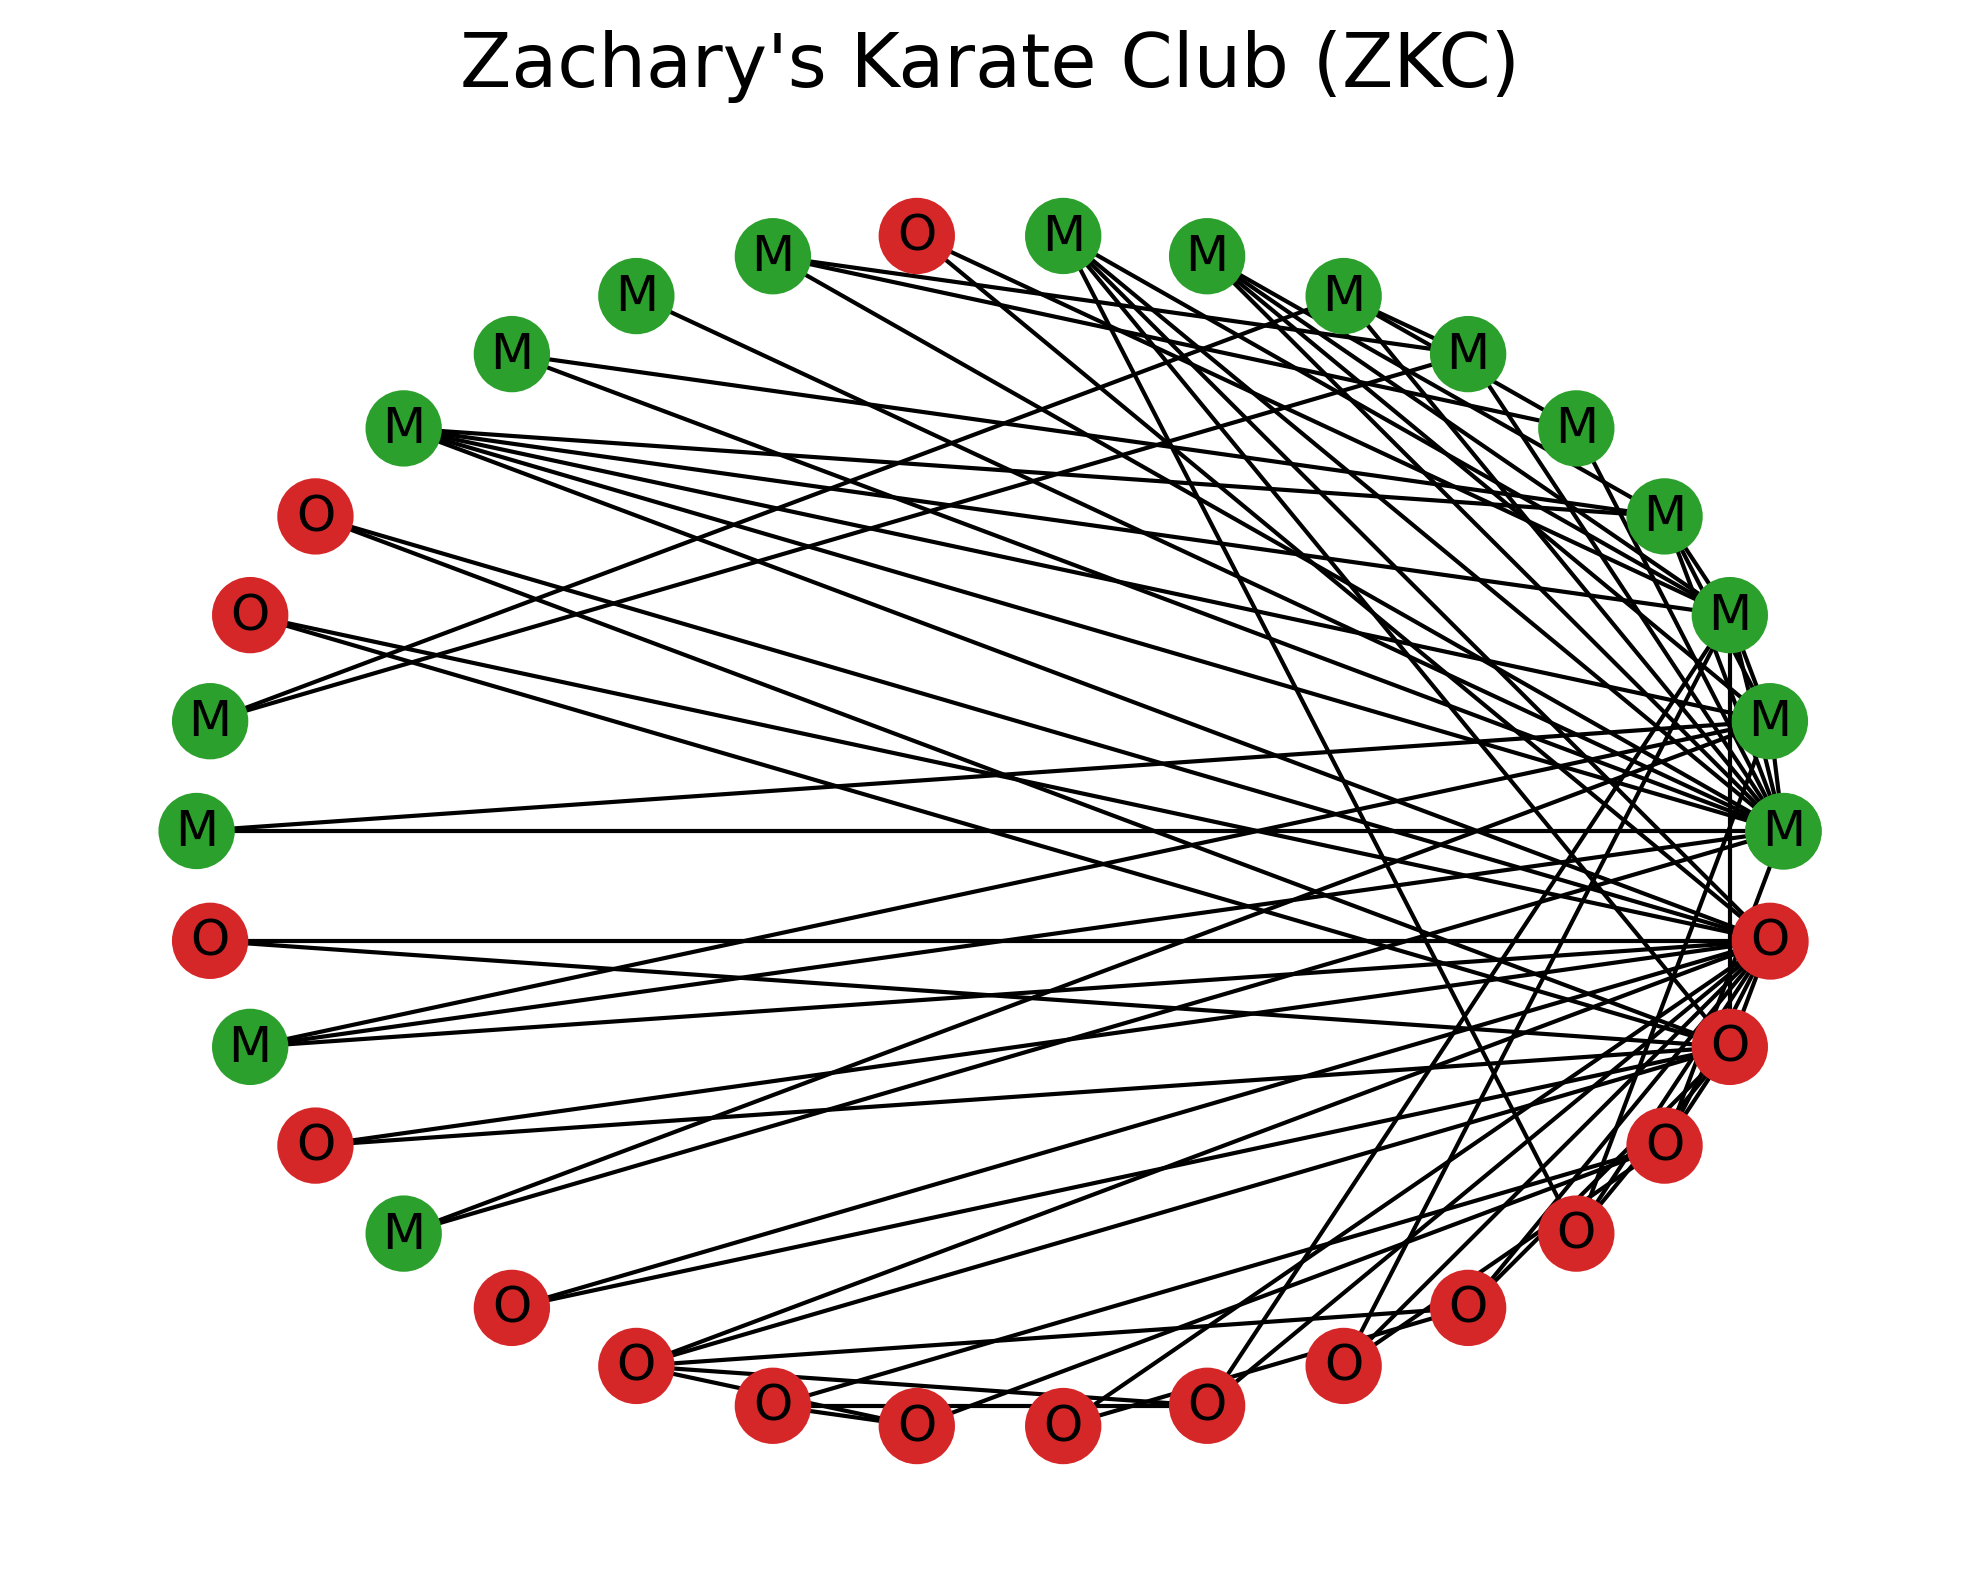

In [6]:
f = plt.figure(dpi=300)
# To plot using networkx we first need to get the positions we want for each node. 
# Here we will use a ciruclar layout but there are many other variations you could choose!
circ_pos = nx.circular_layout(ZKC_graph) 

colors = []
club_dic = {}

for k, v in club_labels.items():
    if v == 'Mr. Hi':
        colors.append('tab:green')
        club_dic.update({
            k : 'M'
        })
    else:
        colors.append('tab:red')
        club_dic.update({
            k : 'O'
        })

# Use the networkx draw function to easily visualise the graph
nx.draw(ZKC_graph, circ_pos, node_color=colors, with_labels=True, labels=club_dic)

# Let's highlight Mr Hi (green) and John A (red)
plt.title("Zachary's Karate Club (ZKC)", fontsize=18)
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=[Mr_Hi], node_color='tab:green')
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=[John_A], node_color='tab:red')
plt.show()
f.savefig('ZKC_2.png', dpi=300)

In [7]:
density = nx.density(ZKC_graph)

print('The edge density is: ' + str(density))

The edge density is: 0.13903743315508021


In [8]:
# The degree function in networkx returns a DegreeView object capable of iterating through (node, degree) pairs
degree = ZKC_graph.degree()

degree_list = []

for (n, d) in degree:
    degree_list.append(d)

av_degree = sum(degree_list) / len(degree_list)

print('The average degree is ' + str(av_degree))

The average degree is 4.588235294117647


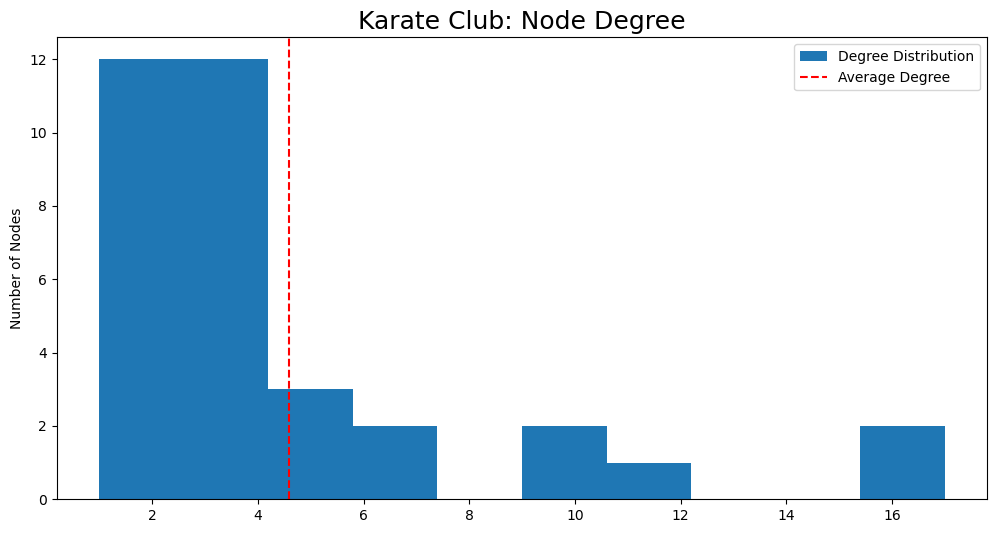

In [19]:
f = plt.figure(figsize=(12, 6))
# We now plot the degree distribution to get a better insight
plt.hist(degree_list,label='Degree Distribution')
plt.axvline(av_degree,color='r',linestyle='dashed',label='Average Degree')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Karate Club: Node Degree', fontsize=18)
plt.show()
f.savefig('Karate_Club_Node_Degree.png', dpi=300)

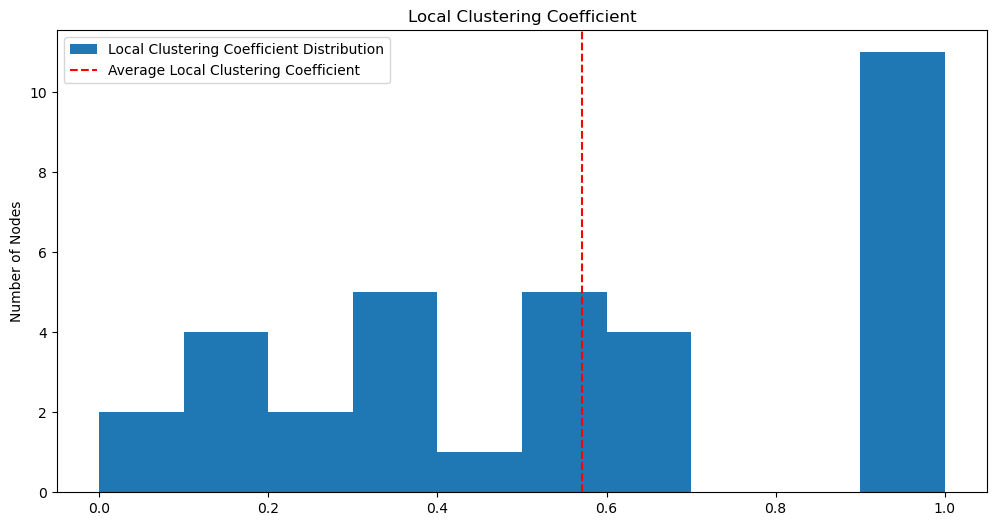

In [20]:
f = plt.figure(figsize=(12, 6))
# Now we can compute the local clustering coefficient
local_clustering_coefficient = nx.algorithms.cluster.clustering(ZKC_graph)

# Lets find the average clustering coefficient
av_local_clustering_coefficient = sum(local_clustering_coefficient.values())/len(local_clustering_coefficient)

# Similarly to the degree lets plot the local clustering coefficient distribution
plt.hist(
    local_clustering_coefficient.values(),
    label='Local Clustering Coefficient Distribution'
)
plt.axvline(
    av_local_clustering_coefficient,
    color='r',
    linestyle='dashed',
    label='Average Local Clustering Coefficient'
)
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Local Clustering Coefficient')
plt.show()
f.savefig('Clustering_SIR.png', dpi=300)

In [11]:
# Preform the community detection
c = list(greedy_modularity_communities(ZKC_graph))

# Let's find out how many communities we detected
print(len(c))

3


In [12]:
# Lets see these 3 clusters
community_0 = sorted(c[0])
community_1 = sorted(c[1])
community_2 = sorted(c[2])

print(community_0)
print(community_1)
print(community_2)

[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[1, 2, 3, 7, 9, 12, 13, 17, 21]
[0, 4, 5, 6, 10, 11, 16, 19]


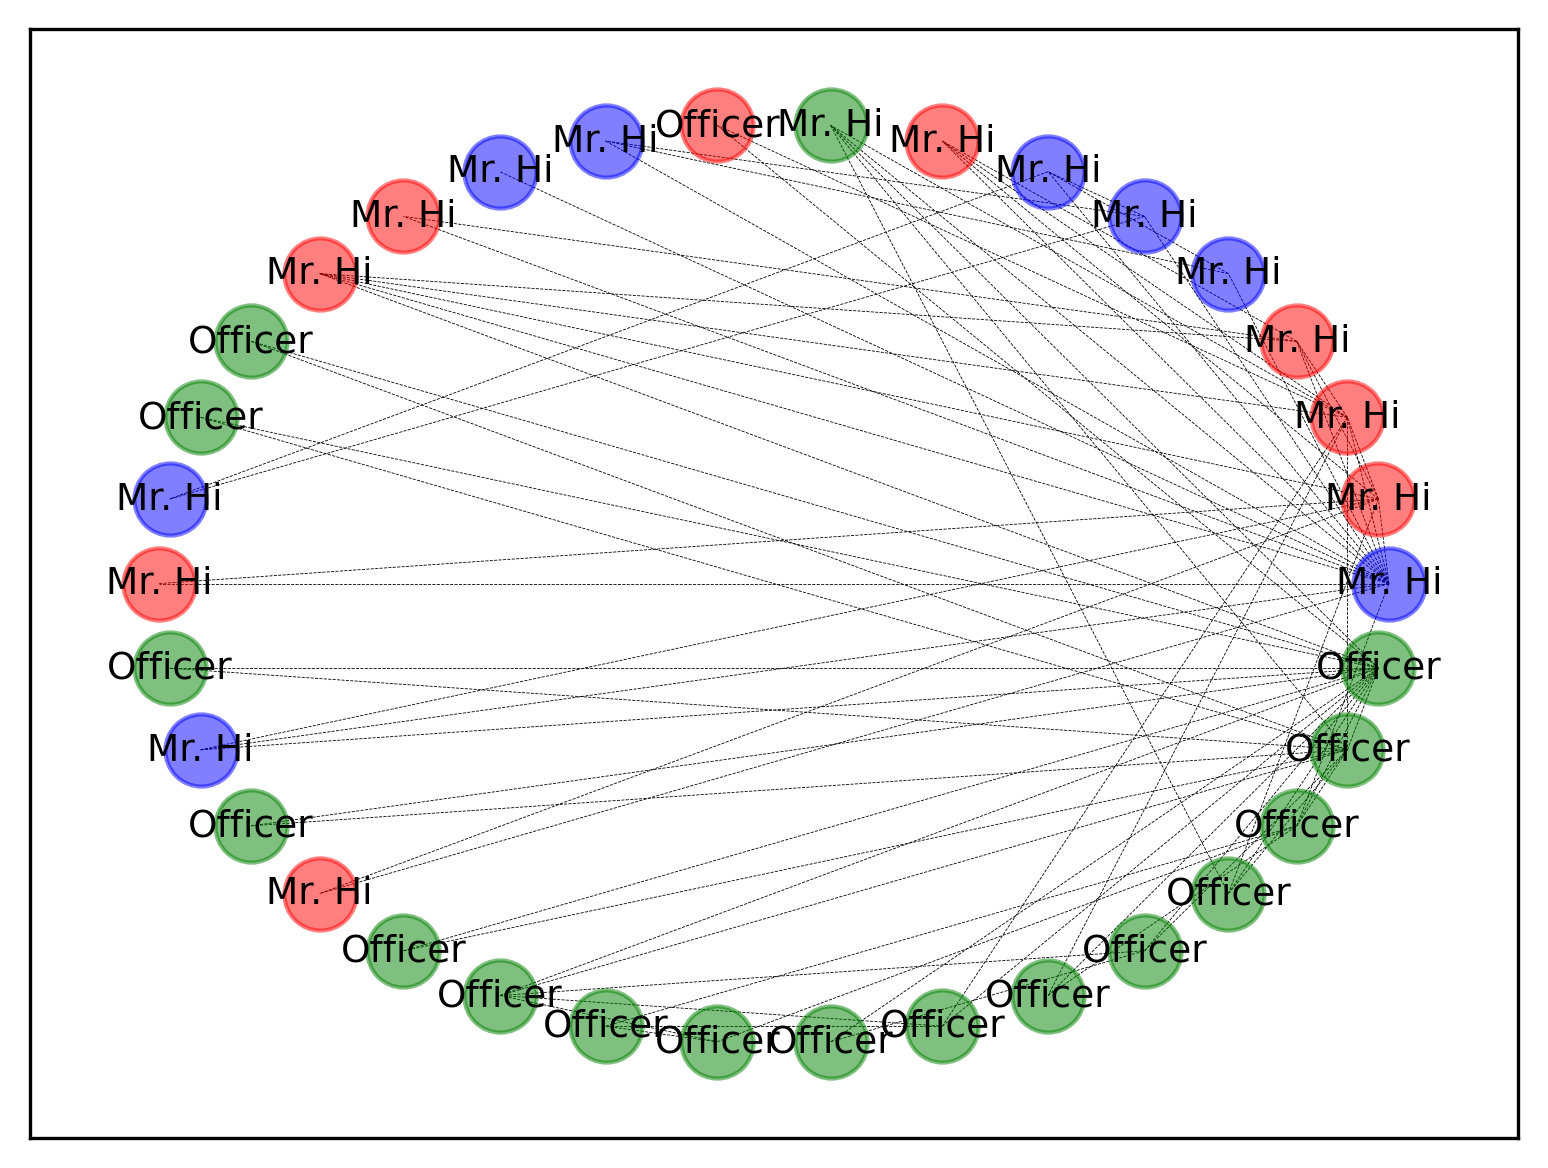

In [27]:
f = plt.figure(dpi=300)

# Draw each set of nodes in a seperate colour
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=community_0, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=community_1, node_color='r', alpha=0.5)
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=community_2, node_color='b', alpha=0.5)

# Now we can add edges to the drawing 
nx.draw_networkx_edges(ZKC_graph, circ_pos, style='dashed', width = 0.2)

# Finally we can add labels to each node corresponding to the final club each member joined 
nx.draw_networkx_labels(ZKC_graph, circ_pos, club_labels, font_size=9)

plt.show()
f.savefig('Communities_1.png', dpi=300)

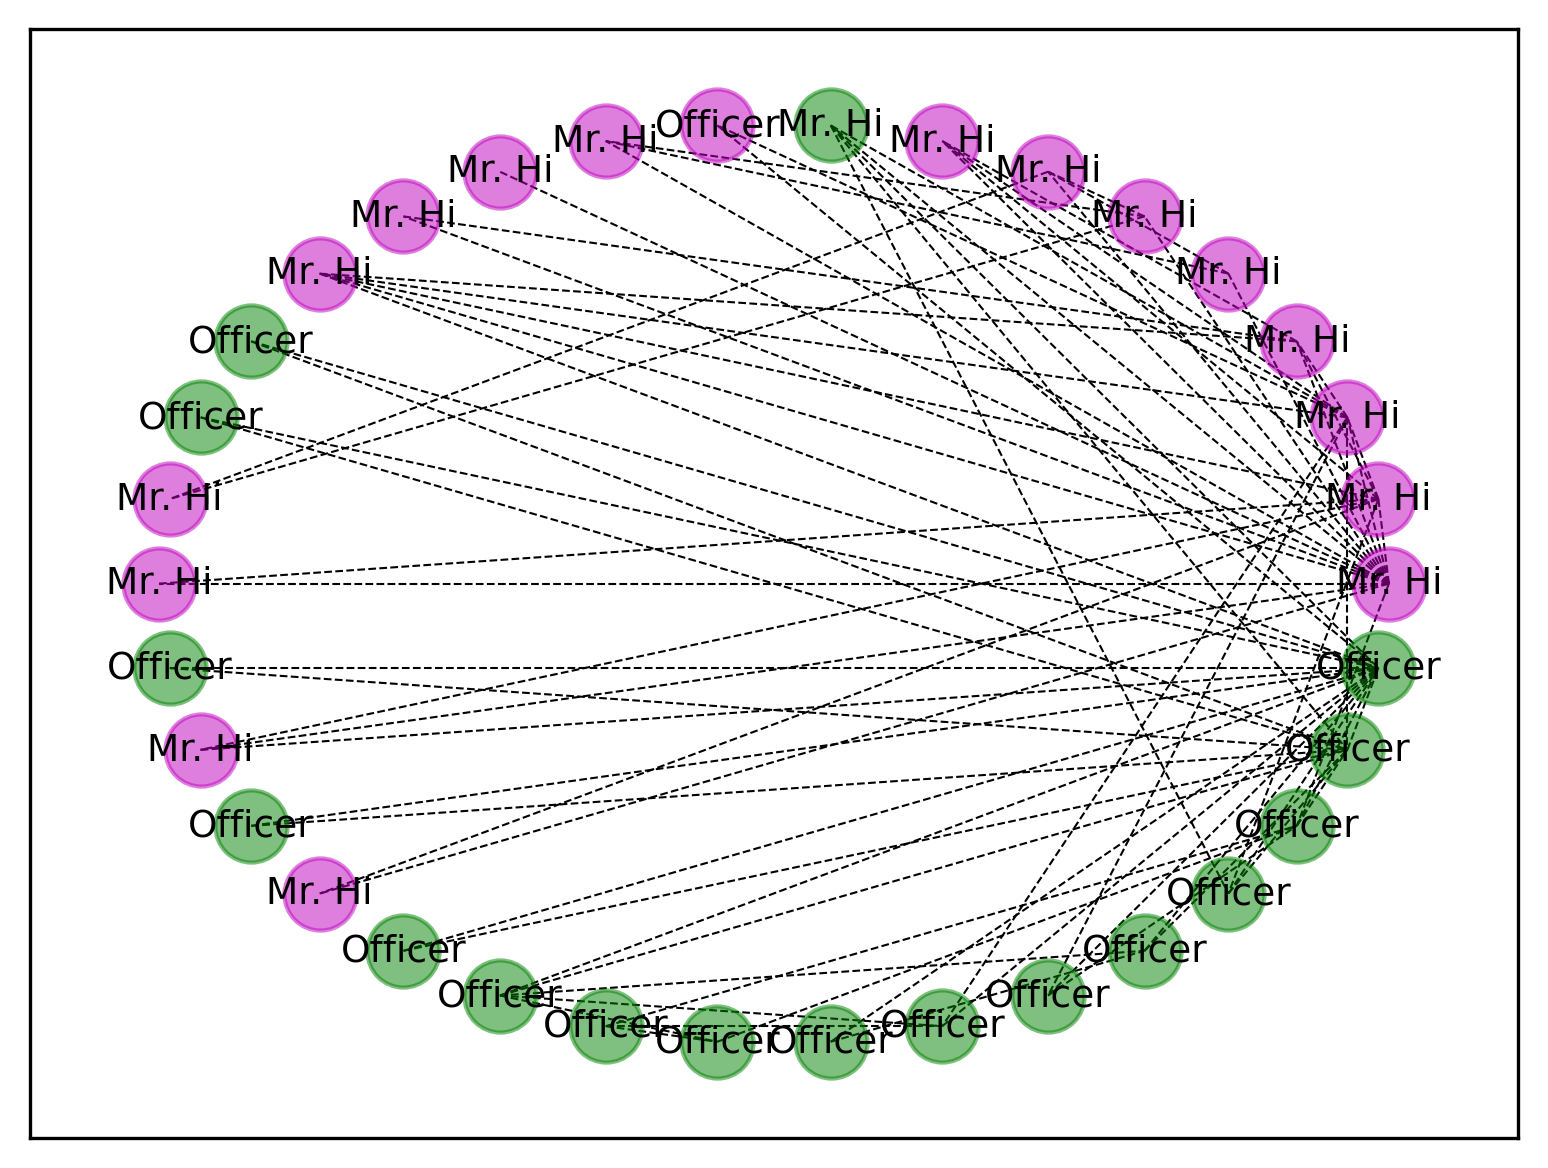

In [28]:
f = plt.figure(dpi=300)
combined_community = community_1 + community_2

# Draw the network as before
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=community_0, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=combined_community, node_color='m', alpha=0.5)

nx.draw_networkx_edges(ZKC_graph, circ_pos, style='dashed', width = 0.5)

nx.draw_networkx_labels(ZKC_graph, circ_pos, club_labels, font_size=9)

plt.show()
f.savefig('Communities_2.png', dpi=300)